# Housing Prices: Advanced Regression Techniques

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

# Handling the missing values

In [5]:
#find missing values

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

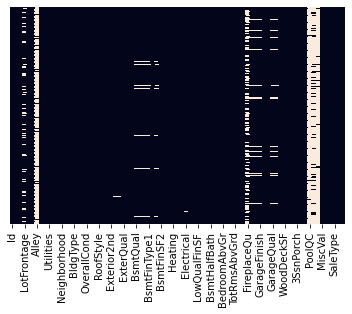

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Fill missing values

#From above, LotFrontage has 259 missing values, next step is to fill these values, since the dtype is int/float so mean is used

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [9]:
#Since alley has 91 non-null value, so we'll remove this feature

df.drop(['Alley'], axis=1, inplace=True)
df.drop(['FireplaceQu'], axis=1, inplace=True)
df.drop(['PoolQC'], axis=1, inplace=True)
df.drop(['Fence'], axis=1, inplace=True)
df.drop(['MiscFeature'], axis=1, inplace=True)
df.drop(['Id'], axis=1, inplace=True)

In [10]:
#the dtype is object i.e. categorical feature so mode is used

df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0]) 
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0]) 
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0]) 
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0]) 
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0]) 
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0]) 

In [11]:
df.shape

(1460, 75)

In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Handling the categorical features

In [13]:
# list of categorical (dtype=objects) features

columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [14]:
len(columns)

38

In [15]:
# 'BsmtCond' feature has 4 categorical features (TA, Gd, Fa, Po)
df['BsmtCond'].value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [16]:
# Handling all the features and converting into categorical features

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [17]:
main_df = df.copy()

In [18]:
# Combine test and train data row wise

test_df = pd.read_csv('formulatedtest.csv')
final_df = pd.concat([df, test_df], axis=0)

In [19]:
pd.set_option('display.max_rows', None)
df.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL    65.000000     8450   Pave      Reg         Lvl   
1             20       RL    80.000000     9600   Pave      Reg         Lvl   
2             60       RL    68.000000    11250   Pave      IR1         Lvl   
3             70       RL    60.000000     9550   Pave      IR1         Lvl   
4             60       RL    84.000000    14260   Pave      IR1         Lvl   
5             50       RL    85.000000    14115   Pave      IR1         Lvl   
6             20       RL    75.000000    10084   Pave      Reg         Lvl   
7             60       RL    70.049958    10382   Pave      IR1         Lvl   
8             50       RM    51.000000     6120   Pave      Reg         Lvl   
9            190       RL    50.000000     7420   Pave      Reg         Lvl   
10            20       RL    70.000000    11200   Pave      Reg         Lvl   
11            60    

In [20]:
pd.set_option('display.max_rows', None)
final_df.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL    65.000000     8450   Pave      Reg         Lvl   
1             20       RL    80.000000     9600   Pave      Reg         Lvl   
2             60       RL    68.000000    11250   Pave      IR1         Lvl   
3             70       RL    60.000000     9550   Pave      IR1         Lvl   
4             60       RL    84.000000    14260   Pave      IR1         Lvl   
5             50       RL    85.000000    14115   Pave      IR1         Lvl   
6             20       RL    75.000000    10084   Pave      Reg         Lvl   
7             60       RL    70.049958    10382   Pave      IR1         Lvl   
8             50       RM    51.000000     6120   Pave      Reg         Lvl   
9            190       RL    50.000000     7420   Pave      Reg         Lvl   
10            20       RL    70.000000    11200   Pave      Reg         Lvl   
11            60    

In [21]:
final_df.shape

(2919, 75)

In [22]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [23]:
final_df.shape

(2919, 233)

In [24]:
# remove duplicate entries

final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [25]:
final_df.shape

(2919, 177)

In [26]:
# to view categorical features
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


# Apply Algorithm

In [27]:
df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1460:,:]

In [28]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Jadon\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
df_test.shape

(1459, 176)

In [30]:
# x_train contains every feature except saleprice and y_train only contains saleprice
x_train = df_train.drop(['SalePrice'],axis=1)
y_train = df_train['SalePrice']

In [31]:
## OPTION 1 /0.14309/

# XGBoost is an implementation of gradient boosted decision trees designed for speed and performance
import xgboost
classifier = xgboost.XGBRegressor()
#classifier.fit(x_train,y_train)

In [32]:
import xgboost
regressor = xgboost.XGBRegressor()

In [33]:
# Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [34]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [35]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   32.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 12.8min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [36]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [38]:
regressor.fit(x_train,y_train)

[17:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:56:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
## OPTION 2

# import numpy as np
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(x_train, y_train)

In [40]:
## OPTION 3

# from sklearn.datasets import load_diabetes
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor(random_state=0)
# cross_val_score(regressor, x_train, y_train, cv=10)
# regressor.fit(x_train, y_train,sample_weight=None, check_input=True, X_idx_sorted=None)

In [41]:
## OPTION 4

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression
# regr = RandomForestRegressor(max_depth=2, random_state=0)
# regr.fit(x_train, y_train)

In [42]:
#reg.coef_

In [43]:
#classifier.coef_

In [44]:
import pickle
filename = "finalized_model.pkl"
pickle.dump(classifier,open(filename,"wb"))

In [45]:
#pd.isnull(df_test).sum() 

In [46]:
#df_test.info
#np.any(np.isnan(df_test))

In [47]:
#to clean the dataset of nan, Inf, and missing cells
# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)
# clean_dataset(df_test)

In [48]:
#np.all(np.isfinite(df_test))

In [49]:
y_pred = regressor.predict(df_test)

In [50]:
y_pred

array([117345.375, 160504.48 , 185364.77 , ..., 176197.73 , 118340.305,
       233172.34 ], dtype=float32)

In [51]:
# Create sample submission file and submit it

pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("sample_submission.csv")
datasets = pd.concat([sub_df['Id'],pred], axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

# Artificial Neural Network Implementation

In [64]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 176))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\Jadon\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=176, units=50, kernel_initializer="he_uniform")`
  if sys.path[0] == '':
C:\Users\Jadon\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  from ipykernel import kernelapp as app
C:\Users\Jadon\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\Users\Jadon\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1168 samples, validate on 292 samples
Epoch 1/1000
1168/1168 [==============================] - 4s 3ms/step - loss: 142314.1163 - val_loss: 68580.9050
Epoch 2/1000
1168/1168 [==============================] - 0s 219us/step - loss: 66112.8069 - val_loss: 63346.7659
Epoch 3/1000
1168/1168 [==============================] - 0s 240us/step - loss: 62276.4988 - val_loss: 61076.7514
Epoch 4/1000
1168/1168 [==============================] - 0s 219us/step - loss: 59292.6514 - val_loss: 58991.3673
Epoch 5/1000
1168/1168 [==============================] - 0s 213us/step - loss: 55942.0402 - val_loss: 57371.9016
Epoch 6/1000
1168/1168 [==============================] - 0s 276us/step - loss: 54170.2621 - val_loss: 55693.7875
Epoch 7/1000
1168/1168 [==============================] - 0s 212us/step - loss: 50932.9926 - val_loss: 53713.1857
Epoch 8/1000
1168/1168 [==============================] - 0s

Epoch 66/1000
1168/1168 [==============================] - 0s 171us/step - loss: 33424.7112 - val_loss: 44639.3380
Epoch 67/1000
1168/1168 [==============================] - 0s 199us/step - loss: 32970.3641 - val_loss: 44643.6690
Epoch 68/1000
1168/1168 [==============================] - 0s 178us/step - loss: 33186.0265 - val_loss: 45324.0149
Epoch 69/1000
1168/1168 [==============================] - 0s 171us/step - loss: 33169.9581 - val_loss: 45610.5745
Epoch 70/1000
1168/1168 [==============================] - 0s 178us/step - loss: 33262.4022 - val_loss: 46616.6044
Epoch 71/1000
1168/1168 [==============================] - 0s 164us/step - loss: 32988.5618 - val_loss: 44911.1502
Epoch 72/1000
1168/1168 [==============================] - 0s 178us/step - loss: 32907.4472 - val_loss: 45220.0822
Epoch 73/1000
1168/1168 [==============================] - 0s 171us/step - loss: 33058.7631 - val_loss: 44858.4246
Epoch 74/1000
1168/1168 [==============================] - 0s 178us/step - loss:

1168/1168 [==============================] - 0s 226us/step - loss: 31207.0056 - val_loss: 44477.3860
Epoch 137/1000
1168/1168 [==============================] - 0s 193us/step - loss: 31081.8457 - val_loss: 44967.0945
Epoch 138/1000
1168/1168 [==============================] - 0s 185us/step - loss: 30831.0066 - val_loss: 45599.8741
Epoch 139/1000
1168/1168 [==============================] - 0s 218us/step - loss: 31223.2978 - val_loss: 44563.5587
Epoch 140/1000
1168/1168 [==============================] - 0s 219us/step - loss: 30904.6533 - val_loss: 44882.8889
Epoch 141/1000
1168/1168 [==============================] - 0s 185us/step - loss: 31489.4741 - val_loss: 44412.7579
Epoch 142/1000
1168/1168 [==============================] - 0s 185us/step - loss: 31366.1655 - val_loss: 45362.9166
Epoch 143/1000
1168/1168 [==============================] - 0s 178us/step - loss: 31232.0782 - val_loss: 44466.5088
Epoch 144/1000
1168/1168 [==============================] - 0s 178us/step - loss: 30197

Epoch 207/1000
1168/1168 [==============================] - 0s 192us/step - loss: 28970.6838 - val_loss: 44053.8321
Epoch 208/1000
1168/1168 [==============================] - 0s 179us/step - loss: 28473.3487 - val_loss: 43395.7219
Epoch 209/1000
1168/1168 [==============================] - 0s 188us/step - loss: 28512.3212 - val_loss: 42761.2152
Epoch 210/1000
1168/1168 [==============================] - 0s 281us/step - loss: 28289.6740 - val_loss: 42620.0145
Epoch 211/1000
1168/1168 [==============================] - 0s 312us/step - loss: 28457.6586 - val_loss: 43067.3693
Epoch 212/1000
1168/1168 [==============================] - 0s 240us/step - loss: 28407.3391 - val_loss: 42702.5127
Epoch 213/1000
1168/1168 [==============================] - 0s 199us/step - loss: 28551.8984 - val_loss: 43346.0898
Epoch 214/1000
1168/1168 [==============================] - 0s 229us/step - loss: 28196.8617 - val_loss: 42920.6165
Epoch 215/1000
1168/1168 [==============================] - 0s 202us/ste

1168/1168 [==============================] - 0s 233us/step - loss: 25515.4096 - val_loss: 39234.7540
Epoch 278/1000
1168/1168 [==============================] - 0s 205us/step - loss: 25326.4895 - val_loss: 44820.0498
Epoch 279/1000
1168/1168 [==============================] - 0s 233us/step - loss: 25854.5585 - val_loss: 41199.4197
Epoch 280/1000
1168/1168 [==============================] - 0s 169us/step - loss: 25292.6280 - val_loss: 39252.0588
Epoch 281/1000
1168/1168 [==============================] - 0s 399us/step - loss: 25817.7899 - val_loss: 40863.3241
Epoch 282/1000
1168/1168 [==============================] - 0s 390us/step - loss: 25244.4783 - val_loss: 39798.3393
Epoch 283/1000
1168/1168 [==============================] - 0s 337us/step - loss: 26237.3332 - val_loss: 40577.5823
Epoch 284/1000
1168/1168 [==============================] - 0s 166us/step - loss: 24962.3811 - val_loss: 40598.3221
Epoch 285/1000
1168/1168 [==============================] - 0s 199us/step - loss: 25271

Epoch 348/1000
1168/1168 [==============================] - 0s 155us/step - loss: 23241.6381 - val_loss: 37421.2099
Epoch 349/1000
1168/1168 [==============================] - 0s 175us/step - loss: 23334.9835 - val_loss: 38091.3514
Epoch 350/1000
1168/1168 [==============================] - 0s 161us/step - loss: 23589.8509 - val_loss: 37317.9675
Epoch 351/1000
1168/1168 [==============================] - 0s 189us/step - loss: 23783.9889 - val_loss: 39334.2728
Epoch 352/1000
1168/1168 [==============================] - 0s 191us/step - loss: 23013.1001 - val_loss: 42170.8589
Epoch 353/1000
1168/1168 [==============================] - 0s 166us/step - loss: 23803.1793 - val_loss: 37848.1163
Epoch 354/1000
1168/1168 [==============================] - 0s 193us/step - loss: 23749.9245 - val_loss: 37195.1667
Epoch 355/1000
1168/1168 [==============================] - 0s 187us/step - loss: 23207.7048 - val_loss: 36978.4655
Epoch 356/1000
1168/1168 [==============================] - 0s 165us/ste

1168/1168 [==============================] - 0s 178us/step - loss: 22610.5087 - val_loss: 36516.7492
Epoch 419/1000
1168/1168 [==============================] - 0s 298us/step - loss: 22038.4253 - val_loss: 36020.9161
Epoch 420/1000
1168/1168 [==============================] - 0s 205us/step - loss: 22015.1129 - val_loss: 36238.8966
Epoch 421/1000
1168/1168 [==============================] - 0s 226us/step - loss: 22145.1851 - val_loss: 36873.3762
Epoch 422/1000
1168/1168 [==============================] - 0s 212us/step - loss: 21884.0681 - val_loss: 36131.8537
Epoch 423/1000
1168/1168 [==============================] - 0s 192us/step - loss: 21385.5456 - val_loss: 39401.2709
Epoch 424/1000
1168/1168 [==============================] - 0s 200us/step - loss: 22029.8685 - val_loss: 36201.6743
Epoch 425/1000
1168/1168 [==============================] - 0s 227us/step - loss: 22216.5074 - val_loss: 35644.5204
Epoch 426/1000
1168/1168 [==============================] - 0s 199us/step - loss: 21705

1168/1168 [==============================] - 0s 166us/step - loss: 20324.4701 - val_loss: 34111.6574
Epoch 489/1000
1168/1168 [==============================] - 0s 191us/step - loss: 21214.3306 - val_loss: 33871.8145
Epoch 490/1000
1168/1168 [==============================] - 0s 191us/step - loss: 20814.1278 - val_loss: 34039.6060
Epoch 491/1000
1168/1168 [==============================] - 0s 187us/step - loss: 21203.2175 - val_loss: 35420.1835
Epoch 492/1000
1168/1168 [==============================] - 0s 185us/step - loss: 20646.1329 - val_loss: 34565.6764
Epoch 493/1000
1168/1168 [==============================] - 0s 199us/step - loss: 20710.1799 - val_loss: 34402.0304
Epoch 494/1000
1168/1168 [==============================] - 0s 176us/step - loss: 20850.0590 - val_loss: 35357.8781
Epoch 495/1000
1168/1168 [==============================] - 0s 177us/step - loss: 20684.4955 - val_loss: 34718.9557
Epoch 496/1000
1168/1168 [==============================] - 0s 174us/step - loss: 20771

Epoch 559/1000
1168/1168 [==============================] - 0s 218us/step - loss: 21130.7525 - val_loss: 34368.6926
Epoch 560/1000
1168/1168 [==============================] - 0s 190us/step - loss: 19729.0822 - val_loss: 33989.5548
Epoch 561/1000
1168/1168 [==============================] - 0s 192us/step - loss: 19620.7092 - val_loss: 39325.1185
Epoch 562/1000
1168/1168 [==============================] - 0s 174us/step - loss: 20542.4803 - val_loss: 33432.2965
Epoch 563/1000
1168/1168 [==============================] - 0s 274us/step - loss: 19735.8421 - val_loss: 32095.7827
Epoch 564/1000
1168/1168 [==============================] - ETA: 0s - loss: 19408.416 - 0s 197us/step - loss: 19848.8467 - val_loss: 32836.8192
Epoch 565/1000
1168/1168 [==============================] - 0s 260us/step - loss: 19551.3901 - val_loss: 36300.7008
Epoch 566/1000
1168/1168 [==============================] - 0s 179us/step - loss: 19458.0466 - val_loss: 33489.1217
Epoch 567/1000
1168/1168 [==================

1168/1168 [==============================] - 0s 199us/step - loss: 19157.3274 - val_loss: 33293.2475
Epoch 630/1000
1168/1168 [==============================] - 0s 212us/step - loss: 18773.8633 - val_loss: 34760.8746
Epoch 631/1000
1168/1168 [==============================] - 0s 203us/step - loss: 19222.5894 - val_loss: 32986.3488
Epoch 632/1000
1168/1168 [==============================] - 0s 214us/step - loss: 19087.1267 - val_loss: 31490.1801
Epoch 633/1000
1168/1168 [==============================] - 0s 189us/step - loss: 18650.5862 - val_loss: 33965.3049
Epoch 634/1000
1168/1168 [==============================] - 0s 197us/step - loss: 19949.9672 - val_loss: 33837.0800
Epoch 635/1000
1168/1168 [==============================] - 0s 199us/step - loss: 19633.4291 - val_loss: 33299.9609
Epoch 636/1000
1168/1168 [==============================] - 0s 212us/step - loss: 18920.9178 - val_loss: 32569.8393
Epoch 637/1000
1168/1168 [==============================] - 0s 215us/step - loss: 19824

Epoch 700/1000
1168/1168 [==============================] - 0s 206us/step - loss: 19251.2608 - val_loss: 32009.0740
Epoch 701/1000
1168/1168 [==============================] - 0s 249us/step - loss: 18385.8656 - val_loss: 34484.5355
Epoch 702/1000
1168/1168 [==============================] - 0s 205us/step - loss: 18864.4535 - val_loss: 31941.0904
Epoch 703/1000
1168/1168 [==============================] - 0s 185us/step - loss: 18716.0630 - val_loss: 31238.7675
Epoch 704/1000
1168/1168 [==============================] - 0s 274us/step - loss: 17838.1184 - val_loss: 31297.7923
Epoch 705/1000
1168/1168 [==============================] - 0s 243us/step - loss: 18213.0854 - val_loss: 31564.7300
Epoch 706/1000
1168/1168 [==============================] - 0s 249us/step - loss: 19298.6842 - val_loss: 32146.5507
Epoch 707/1000
1168/1168 [==============================] - 0s 333us/step - loss: 19359.4444 - val_loss: 38007.6124
Epoch 708/1000
1168/1168 [==============================] - 0s 279us/ste

1168/1168 [==============================] - 0s 161us/step - loss: 16910.3071 - val_loss: 30926.6524
Epoch 771/1000
1168/1168 [==============================] - 0s 214us/step - loss: 17864.2644 - val_loss: 32806.4541
Epoch 772/1000
1168/1168 [==============================] - 0s 218us/step - loss: 17325.3968 - val_loss: 30902.9502
Epoch 773/1000
1168/1168 [==============================] - 0s 217us/step - loss: 17988.3461 - val_loss: 31652.4591
Epoch 774/1000
1168/1168 [==============================] - 0s 241us/step - loss: 17964.0429 - val_loss: 31401.1448
Epoch 775/1000
1168/1168 [==============================] - 0s 214us/step - loss: 18765.3225 - val_loss: 33103.2239
Epoch 776/1000
1168/1168 [==============================] - 0s 220us/step - loss: 18837.5422 - val_loss: 31460.0455
Epoch 777/1000
1168/1168 [==============================] - 0s 166us/step - loss: 18020.5447 - val_loss: 31020.5466
Epoch 778/1000
1168/1168 [==============================] - 0s 214us/step - loss: 17593

Epoch 841/1000
1168/1168 [==============================] - ETA: 0s - loss: 18255.589 - 0s 174us/step - loss: 18145.8420 - val_loss: 30866.9035
Epoch 842/1000
1168/1168 [==============================] - 0s 226us/step - loss: 17719.4759 - val_loss: 31165.0127
Epoch 843/1000
1168/1168 [==============================] - 0s 319us/step - loss: 17744.8903 - val_loss: 31824.6548
Epoch 844/1000
1168/1168 [==============================] - 0s 260us/step - loss: 17123.2734 - val_loss: 31983.4772
Epoch 845/1000
1168/1168 [==============================] - 0s 294us/step - loss: 17430.9193 - val_loss: 30363.7005
Epoch 846/1000
1168/1168 [==============================] - 0s 253us/step - loss: 17077.7576 - val_loss: 30055.9165
Epoch 847/1000
1168/1168 [==============================] - 0s 216us/step - loss: 18586.3100 - val_loss: 32277.8013
Epoch 848/1000
1168/1168 [==============================] - 0s 181us/step - loss: 17382.8860 - val_loss: 30679.7988
Epoch 849/1000
1168/1168 [==================

1168/1168 [==============================] - 0s 233us/step - loss: 16729.4130 - val_loss: 30689.3696
Epoch 912/1000
1168/1168 [==============================] - 0s 211us/step - loss: 16379.9946 - val_loss: 32569.7145
Epoch 913/1000
1168/1168 [==============================] - 0s 199us/step - loss: 16631.2758 - val_loss: 29594.2926
Epoch 914/1000
1168/1168 [==============================] - 0s 186us/step - loss: 16591.5859 - val_loss: 30847.4149
Epoch 915/1000
1168/1168 [==============================] - 0s 210us/step - loss: 16729.1421 - val_loss: 30331.7916
Epoch 916/1000
1168/1168 [==============================] - 0s 184us/step - loss: 17139.2996 - val_loss: 31629.8697
Epoch 917/1000
1168/1168 [==============================] - 0s 229us/step - loss: 16715.6582 - val_loss: 30286.1843
Epoch 918/1000
1168/1168 [==============================] - 0s 253us/step - loss: 16131.9257 - val_loss: 30931.9543
Epoch 919/1000
1168/1168 [==============================] - 0s 241us/step - loss: 17319

Epoch 982/1000
1168/1168 [==============================] - 0s 174us/step - loss: 16426.6270 - val_loss: 31622.7718
Epoch 983/1000
1168/1168 [==============================] - 0s 174us/step - loss: 15879.1664 - val_loss: 30236.1641
Epoch 984/1000
1168/1168 [==============================] - 0s 166us/step - loss: 16938.5755 - val_loss: 29928.2021
Epoch 985/1000
1168/1168 [==============================] - 0s 159us/step - loss: 16473.3045 - val_loss: 30067.5134
Epoch 986/1000
1168/1168 [==============================] - 0s 161us/step - loss: 16696.3014 - val_loss: 31557.6468
Epoch 987/1000
1168/1168 [==============================] - 0s 161us/step - loss: 15836.0461 - val_loss: 31215.6878
Epoch 988/1000
1168/1168 [==============================] - 0s 187us/step - loss: 16399.4063 - val_loss: 31378.3193
Epoch 989/1000
1168/1168 [==============================] - 0s 171us/step - loss: 16767.2959 - val_loss: 29968.4812
Epoch 990/1000
1168/1168 [==============================] - 0s 164us/ste

In [62]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
